# 1. Image Classification with the MNIST Dataset

In this section we will do the "Hello World" of deep learning: training a deep learning model to correctly classify hand-written digits.

## 1.1 Objectives

* Understand how deep learning can solve problems traditional programming methods cannot
* Learn about the MNIST handwritten digits dataset
* Use the [torchvision](https://pytorch.org/vision/stable/index.html) to load the MNIST dataset and prepare it for training
* Create a simple neural network to perform image classification
* Train the neural network using the prepped MNIST dataset
* Observe the performance of the trained neural network

Let's begin by loading the libraries used in this notebook:

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

# Visualization tools
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In PyTorch, we can use our GPU in our operations by setting the [device](https://pytorch.org/docs/stable/tensor_attributes.html#torch.device) to `cuda`. The function `torch.cuda.is_available()` will confirm PyTorch can recognize the GPU.

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

### 1.1.1 The Problem: Image Classification

In traditional programming, the programmer is able to articulate rules and conditions in their code that their program can then use to act in the correct way. This approach continues to work exceptionally well for a huge variety of problems.

Image classification, which asks a program to correctly classify an image it has never seen before into its correct class, is near impossible to solve with traditional programming techniques. How could a programmer possibly define the rules and conditions to correctly classify a huge variety of images, especially taking into account images that they have never seen?

### 1.1.2 The Solution: Deep Learning

Deep learning excels at pattern recognition by trial and error. By training a deep neural network with sufficient data, and providing the network with feedback on its performance via training, the network can identify, though a huge amount of iteration, its own set of conditions by which it can act in the correct way.

## 1.2 The MNIST Dataset

In the history of deep learning, the accurate image classification of the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), a collection of 70,000 grayscale images of handwritten digits from 0 to 9, was a major development. While today the problem is considered trivial, doing image classification with MNIST has become a kind of "Hello World" for deep learning.

Here are 40 of the images included in the MNIST dataset:

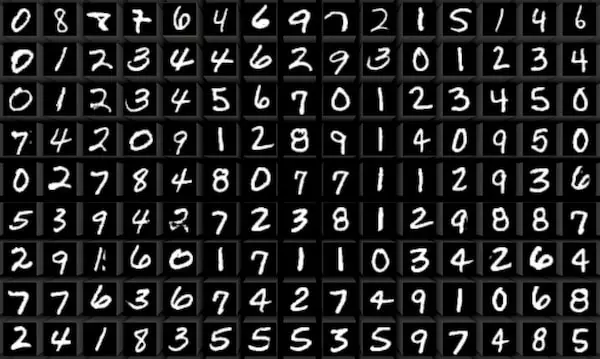

### 1.2.1 Training and Validation Data and Labels

When working with images for deep learning, we need both the images themselves, usually denoted as `X`, and also, correct [labels](https://developers.google.com/machine-learning/glossary#label) for these images, usually denoted as `Y`. Furthermore, we need `X` and `Y` values both for *training* the model, and then, a separate set of `X` and `Y` values for *validating* the performance of the model after it has been trained.

We can imagine these `X` and `Y` pairs as a set of flash cards. A student can train with one set of flashcards, and to validate the student learned the correct concepts, a teacher might quiz the student with a different set of flash cards.

Therefore, we need 4 segments of data for the MNIST dataset:

1. `x_train`: Images used for training the neural network
2. `y_train`: Correct labels for the `x_train` images, used to evaluate the model's predictions during training
3. `x_valid`: Images set aside for validating the performance of the model after it has been trained
4. `y_valid`: Correct labels for the `x_valid` images, used to evaluate the model's predictions after it has been trained

The process of preparing data for analysis is called [Data Engineering](https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7). To learn more about the differences between training data and validation data (as well as test data), check out [this article](https://machinelearningmastery.com/difference-test-validation-datasets/) by Jason Brownlee.

### 1.2.2 Loading the Data Into Memory (with TorchVision)

There are many [deep learning frameworks](https://developer.nvidia.com/deep-learning-frameworks), each with their own merits. In this workshop we will be working with [PyTorch 2](https://pytorch.org/get-started/pytorch-2.0/), and specifically with the [Sequential API](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html). The Sequential API has many useful built in functions designed for constructing neural networks. It is also a legitimate choice for deep learning in a professional setting due to its [readability](https://blog.pragmaticengineer.com/readable-code/) and efficiency, though it is not alone in this regard, and it is worth investigating a variety of frameworks when beginning a deep learning project.

We will also use the [TorchVision](https://pytorch.org/vision/stable/index.html) library. One of the many helpful features that it provides are modules containing helper methods for [many common datasets](https://pytorch.org/vision/main/datasets.html), including MNIST.

We will begin by loading both the `train` and `valid` datasets for [MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

In [3]:
help(torchvision.datasets.MNIST)

Help on class MNIST in module torchvision.datasets.mnist:

class MNIST(torchvision.datasets.vision.VisionDataset)
 |  MNIST(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |
 |  `MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
 |
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where ``MNIST/raw/train-images-idx3-ubyte``
 |          and  ``MNIST/raw/t10k-images-idx3-ubyte`` exist.
 |      train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
 |          otherwise from ``t10k-images-idx3-ubyte``.
 |      transform (callable, optional): A function/transform that  takes in a PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |      download (bool, opti

In [4]:
train_set = torchvision.datasets.MNIST("./data/", train=True, download=True)
valid_set = torchvision.datasets.MNIST("./data/", train=False, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.8MB/s]


We stated above that the MNIST dataset contained 70,000 grayscale images of handwritten digits. By executing the following cells, we can see that TorchVision has partitioned 60,000 of these [PIL Images](https://pillow.readthedocs.io/en/stable/reference/Image.html) for training, and 10,000 for validation (after training).

In [5]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train

In [6]:
valid_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test

*Note*: The `Split` for `valid_set` is stated as `Test`, but we will be using the data for validation in our hands-on exercises. To learn more about the difference between `Train`, `Valid`, and `Test` datasets, please view [this article](https://kili-technology.com/training-data/training-validation-and-test-sets-how-to-split-machine-learning-data) by Kili.

### 1.2.3 Exploring the MNIST Data

Let's take the first x, y pair from `train_set` and review the data structures:

In [7]:
x_0, y_0 = train_set[0]

In [8]:
import numpy as np
x_0

In [9]:
type(x_0)

PIL.Image.Image

Is this a 5 or a poorly written 3? We can view the corresponding label to be sure.

In [10]:
y_0

5

In [11]:
type(y_0)

int

## 1.3 Tensors

If a vector is a 1-dimensional array, and a matrix is a 2-dimensional array, a tensor is an n-dimensional array representing any number of dimensions. Most modern neural network frameworks are powerful tensor processing tools.

One example of a 3-dimensional tensor could be pixels on a computer screen. The different dimensions would be width, height, and color channel. Video games use matrix mathematics to calculate pixel values in a similar way to how neural networks calculate tensors. This is why GPUs are effective tensor processesing machines.

Let's convert our images into tensors so we can later process them with a neural network. TorchVision has a useful function to convert [PIL Images](https://pillow.readthedocs.io/en/stable/reference/Image.html) into tensors with the [ToTensor](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html) class:

In [12]:
trans = transforms.Compose([transforms.ToTensor()])
x_0_tensor = trans(x_0)

/usr/local/lib/python3.12/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


[PyTorch tensors](https://pytorch.org/docs/stable/tensors.html#torch.Tensor) have a number of useful properies and methods. We can verify the data type:

In [13]:
x_0_tensor.dtype

torch.float32

We can verify the minimum and maximum values. PIL Images have a potential integer range of [0, 255], but the [ToTensor](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html) class converts it to a float range of [0.0, 1.0].

In [14]:
x_0_tensor.min()

tensor(0.)

In [15]:
x_0_tensor.max()

tensor(1.)

We can also view the size of each dimension. PyTorch uses a `C x H x W` convention, which means the first dimension is color channel, the second is height, and the third is width.

Since these images are black and white, there is only 1 color channel. The images are square being 28 pixels tall and wide:

In [16]:
x_0_tensor.size()

torch.Size([1, 28, 28])

We can also look at the values directly:

In [17]:
x_0_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

By default, a tensor is processed with a [CPU](https://www.arm.com/glossary/cpu).

In [18]:
x_0_tensor.device

device(type='cpu')

To move it to a GPU, we can use the `.cuda` method.

In [19]:
x_0_gpu = x_0_tensor.cuda()
x_0_gpu.device

device(type='cuda', index=0)

The `.cuda` method will fail if a GPU is not recognized by PyTorch. In order to make our code flexible, we can send our tensor `to` the `device` we identified at the start of this notebook. This way, our code will run much faster if a GPU is available, but the code will not break if there is no available GPU.

In [20]:
x_0_tensor.to(device).device

device(type='cuda', index=0)

Sometimes, it can be hard to interpret so many numbers. Thankfully, TorchVision can convert `C x H x W` tensors back into a PIL image with the [to_pil_image](https://pytorch.org/vision/main/generated/torchvision.transforms.functional.to_pil_image.html) function.

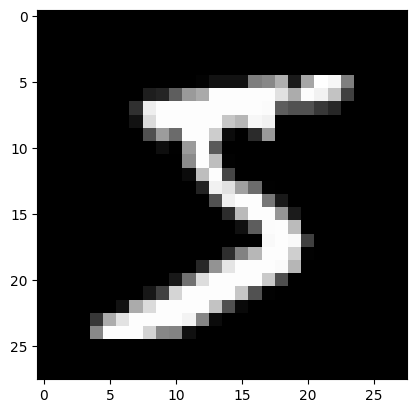

In [21]:
image = F.to_pil_image(x_0_tensor)
plt.imshow(image, cmap='gray')

## 1.4 Preparing the Data for Training

Earlier, we created a `trans` variable to convert an image to a tensor. [Transforms](https://pytorch.org/vision/stable/transforms.html) are a group of torchvision functions that can be used to transform a dataset.

### 1.4.1 Transforms

The [Compose](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Compose.html#torchvision.transforms.v2.Compose) fuction combines a list of transforms. We will learn more about transforms in a later notebook, but have copied the `trans` definition below as an introduction.

In [22]:
trans = transforms.Compose([transforms.ToTensor()])

### Explanation:

1. **`transforms.Compose`**:
   - **Purpose**: `transforms.Compose` is a method from the `torchvision.transforms` module. It is used to compose several image transformations that will be applied sequentially to an input image.
   - **Example**: You can create a pipeline of transformations (e.g., resizing, normalizing, converting to tensor) that will be applied to the image one after another.

2. **`[transforms.ToTensor()]`**:
   - **Purpose**: This is a list containing a single transformation, `transforms.ToTensor()`.
   - **`transforms.ToTensor()`**: This transformation converts a PIL image or a NumPy `ndarray` into a PyTorch tensor. It also scales the pixel values to the range [0.0, 1.0] (from the original range [0, 255] for images).

### What This Line of Code Does:
- **Compose Transformation**: The line of code creates a composed transformation `trans`, which applies the `transforms.ToTensor()` transformation to input images.
- **Usage**: This transformation can be used to preprocess images before feeding them into a PyTorch model. For example:
  ```python
  from torchvision import transforms
  from PIL import Image

  # Define the composed transformation
  trans = transforms.Compose([transforms.ToTensor()])

  # Open an image using PIL
  img = Image.open('path_to_image.jpg')

  # Apply the transformation to the image
  tensor_img = trans(img)
  ```

### Summary:
- The code `trans = transforms.Compose([transforms.ToTensor()])` creates a transformation pipeline that converts input images to PyTorch tensors with pixel values scaled to [0.0, 1.0]. This is a common preprocessing step when working with image data in PyTorch.

Before, we only applied `trans` to one value. There are multiple ways we can apply our list of transforms to a dataset. One such way is to set it to a dataset's `transform` variable.

In [23]:
train_set.transform = trans
valid_set.transform = trans

### 1.4.2 DataLoaders

If our dataset is a deck of flash cards, a [DataLoader](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders) defines how we pull cards from the deck to train an AI model. We could show our models the entire dataset at once. Not only does this take a lot of computational resources, but [research shows](https://arxiv.org/pdf/1804.07612) using a smaller batch of data is more efficient for model training.

For example, if our `batch_size` is 32, we will train our model by shuffling the deck and drawing 32 cards. We do not need to shuffle for validation as the model is not learning, but we will still use a `batch_size` to prevent memory errors.

The batch size is something the model developer decides, and the best value will depend on the problem being solved. Research shows 32 or 64 is sufficient for many machine learning problems and is the default in some machine learning frameworks, so we will use 32 here.

In [24]:
batch_size = 32

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)

## 1.5 Creating the Model

It's time to build the model! Neural networks are composed of layers where each layer performs a mathematical operation on the data it receives before passing it to the next layer. To start, we will create a "Hello World" level model made from 4 components:

1. A [Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) used to convert n-dimensional data into a vector.
2. An input layer, the first layer of neurons
3. A hidden layer, another layor of neurons "hidden" between the input and output
4. An output layer, the last set of neurons which returns the final prediction from the model

More information about these layers is available in [this blog post](https://medium.com/@sarita_68521/basic-understanding-of-neural-network-structure-eecc8f149a23) by Sarita.

Let's create a `layers` variable to hold our list of layers.

In [25]:
layers = []
layers

[]

### 1.5.1 Flattening the Image

When we looked at the shape of our data above, we saw the images had 3 dimensions: `C x H x W`. To flatten an image means to combine all of these images into 1 dimension. Let's say we have a tensor like the one below. Try running the code cell to see what it looks like before and after being flattened.

In [26]:
test_matrix = torch.tensor(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)
test_matrix

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [27]:
nn.Flatten()(test_matrix)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Nothing happened? That's because neural networks expect to recieve a batch of data. Currently, the Flatten layer sees three vectors as opposed to one 2d matrix. To fix this, we can "batch" our data by adding an extra pair of brackets. Since `test_matrix` is now a tensor, we can do that with the shorthand below. `None` adds a new dimension where `:` selects all the data in a tensor.

In [28]:
a = np.array([[[1,2,3],[4,5,6]]])
t = torch.tensor(a) #np.vstack((a,a,a)))
print(t[None, :])
nn.Flatten()(t)

tensor([[[[1, 2, 3],
          [4, 5, 6]]]])


tensor([[1, 2, 3, 4, 5, 6]])

In [29]:
batch_test_matrix = test_matrix[None, :]
batch_test_matrix

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [30]:
nn.Flatten()(batch_test_matrix)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

Order matters! This is what happens when we do it the other way:

In [31]:
nn.Flatten()(test_matrix[:, None])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Now that we've gotten the hang of the `Flatten` layer, let's add it to our list of `layers`.

In [32]:
layers = [
    nn.Flatten()
]
layers

[Flatten(start_dim=1, end_dim=-1)]

### 1.5.2 The Input Layer

Our first layer of neurons connects our flattened image to the rest of our model. To do that, we will use a [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer.

In order to create these weights, Pytorch needs to know the size of our inputs and how many neurons we want to create.
Since we've flattened our images, the size of our inputs is the number of channels, number of pixels vertically, and number of pixels horizontally multiplied together.

In [33]:
input_size = 1 * 28 * 28

Choosing the correct number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset. For now, we will use `512` neurons. Try playing around with this value later to see how it affects training and to start developing a sense for what this number means.

We will learn more about activation functions later, but for now, we will use the [relu](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

In [34]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU()]

### 1.5.3 The Hidden Layer

Now we will add an additional densely connected linear layer. We will cover why adding another set of neurons can help improve learning in the next lesson. Just like how the input layer needed to know the shape of the data that was being passed to it, a hidden layer's [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) needs to know the shape of the data being passed to it. Each neuron in the previous layer will compute one number, so the number of inputs into the hidden layer is the same as the number of neurons in the previous later.

In [35]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
    nn.Linear(512, 512),  # Hidden
    nn.ReLU()  # Activation for hidden
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU()]

### 1.5.4 The Output Layer

Finally, we will add an output layer. In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output is assigned a neuron. The larger the value of the output neuron compared to the other neurons, the more the model predicts the input image belongs to the output neuron's assigned class.

We will not assign the `relu` function to the output layer. Instead, we will apply a `loss function` covered in the next section.

In [36]:
n_classes = 10

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
    nn.Linear(512, 512),  # Hidden
    nn.ReLU(),  # Activation for hidden
    nn.Linear(512, n_classes)  # Output
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

### Code Overview:
The code defines a list called `layers` that includes multiple layers of a neural network. This network is designed to classify MNIST digits into one of 10 classes (digits 0-9).

### Breakdown of the Code:

```python
n_classes = 10
```
- **Number of Classes**: Specifies the number of output classes. Since MNIST digits range from 0 to 9, there are 10 classes.

```python
layers = [
 . . .
]
```
- **Layer Definition**: Creates a list of layers for the neural network. Let's break down each layer:

1. **nn.Flatten()**:
   - **Purpose**: Converts a multi-dimensional input (e.g., 28x28 image) into a 1D vector. This is necessary because fully connected (linear) layers expect 1D inputs.
   - **Example**: A 28x28 MNIST image is flattened into a 784-element vector.

2. **nn.Linear(input_size, 512)**:
   - **Purpose**: A fully connected layer that takes the flattened input and transforms it to 512 features.
   - **Input Size**: `input_size` should be 784 for MNIST images (28x28).
   - **Output Size**: 512 neurons.

3. **nn.ReLU()**:
   - **Purpose**: Applies the Rectified Linear Unit (ReLU) activation function to introduce non-linearity. ReLU replaces negative values with zero.

4. **nn.Linear(512, 512)**:
   - **Purpose**: Another fully connected layer that takes the 512 features from the previous layer and transforms them to 512 features.
   - **Input Size**: 512 neurons.
   - **Output Size**: 512 neurons.

5. **nn.ReLU()**:
   - **Purpose**: Applies the ReLU activation function again to introduce non-linearity.

6. **nn.Linear(512, n_classes)**:
   - **Purpose**: The final fully connected layer that maps the 512 features to `n_classes` (10 in this case).
   - **Input Size**: 512 neurons.
   - **Output Size**: 10 neurons, representing the 10 classes of MNIST digits.

### Summary:
This code sets up a neural network for MNIST digit classification with the following architecture:
- A flattening layer to prepare the input.
- Two fully connected (linear) layers with 512 neurons each, interleaved with ReLU activation functions for non-linearity.
- A final fully connected layer mapping to the 10 output classes.

You can now use this list of layers to create a model, such as with `nn.Sequential` in PyTorch:
```python
model = nn.Sequential(*layers)
```

### 1.5.5 Compiling the Model

A [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) model expects a sequence of arguments, not a list, so we can use the [* operator](https://docs.python.org/3/reference/expressions.html#expression-lists) to unpack our list of layers into a sequence. We can print the model to verify these layers loaded correctly.

In [37]:
model = nn.Sequential(*layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

Much like tensors, when the model is first initialized, it will be processed on a CPU. To have it process with a GPU, we can use `to(device)`.

In [38]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

To check which device a model is on, we can check which device the model parameters are on. Check out this [stack overflow](https://stackoverflow.com/questions/58926054/how-to-get-the-device-type-of-a-pytorch-module-conveniently) post for more information.

In [39]:
next(model.parameters()).device

device(type='cuda', index=0)

[PyTorch 2.0](https://pytorch.org/get-started/pytorch-2.0/) introduced the ability to compile a model for faster performance. Learn more about it [here](https://pytorch.org/tutorials/intermediate/torch_compile_tutorial.html).

In [40]:
model = torch.compile(model)

## 1.6 Training the Model

Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

"Training a model with data" is often also called "fitting a model to data." Put another way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.

### 1.6.1 Loss and Optimization

Just like how teachers grade students, we need to provide the model a function in which to grade its answers. This is called a `loss function`. We will use a type of loss function called [CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) which is designed to grade if a model predicted the correct category from a group of categories.

In [41]:
loss_function = nn.CrossEntropyLoss()

Next, we select an `optimizer` for our model. If the `loss_function` provides a grade, the optimizer tells the model how to learn from this grade to do better next time.

In [42]:
optimizer = Adam(model.parameters())

### 1.6.2 Calculating Accuracy

While the results of the loss function are effective in helping our model learn, the values can be difficult to interpret for humans. This is why data scientists often include other metrics like accuracy.

In order to accurately calculate accuracy, we should compare the number of correct classifications compared to the total number of predictions made. Since we're showing data to the model in batches, our accuracy can be calculated along with these batches.

First, the total number of predictions is the same size as our dataset. Let's assign the size of our datasets to `N` where `n` is synonymous with the `batch size`.

In [43]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)

Next, we'll make a function to calculate the accuracy for each batch. The result is a fraction of the total accuracy, so we can add the accuracy of each batch together to get the total.

In [44]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

### Function Overview:
The `get_batch_accuracy` function calculates the accuracy of a batch of predictions made by the neural network. It compares the predicted labels with the true labels and returns the accuracy as a proportion of correct predictions.

### Breakdown of the Code:

1. **Input Parameters**:
   - `output`: The predicted output from the neural network. This is usually a tensor of shape `(batch_size, num_classes)`, where `batch_size` is the number of samples in the batch and `num_classes` is the number of possible classes.
   - `y`: The true labels for the batch. This is a tensor of shape `(batch_size,)` containing the correct class indices for each sample.
   - `N`: The total number of samples in the batch.

2. **Calculate Predictions**:
   ```python
   pred = output.argmax(dim=1, keepdim=True)
   ```
   - `output.argmax(dim=1, keepdim=True)`: This line finds the index of the maximum value along the `num_classes` dimension for each sample in the batch. This index represents the predicted class for each sample. `dim=1` specifies that we want to find the maximum along the class dimension, and `keepdim=True` retains the original dimensions (making `pred` a tensor of shape `(batch_size, 1)`).

3. **Compare Predictions with True Labels**:
   ```python
   correct = pred.eq(y.view_as(pred)).sum().item()
   ```
   - `pred.eq(y.view_as(pred))`: This line checks if the predicted labels (`pred`) match the true labels (`y`). The `y.view_as(pred)` ensures that `y` is reshaped to have the same dimensions as `pred` (i.e., `(batch_size, 1)`). The result is a tensor of the same shape containing `True` for correct predictions and `False` for incorrect ones.
   - `.sum()`: Counts the number of `True` values (i.e., correct predictions) in the tensor.
   - `.item()`: Converts the sum from a tensor to a Python scalar value.

4. **Calculate Accuracy**:
   ```python
   return correct / N
   ```
   - This line calculates the accuracy as the proportion of correct predictions out of the total number of samples in the batch (`N`).

### Summary:
The `get_batch_accuracy` function computes the accuracy of a batch of predictions by comparing the predicted labels to the true labels and calculating the proportion of correct predictions. It's a useful metric to evaluate the performance of the neural network during training and validation.

### 1.6.3 The Train Function

In [45]:
def train():
    loss = 0
    accuracy = 0

    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        output = model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))


### Train Function Explanation

#### Function Overview:
The `train` function is used to train a machine learning model using PyTorch. It involves iterating over the training dataset, calculating the loss, performing backpropagation, and updating the model's weights.

#### Breakdown of the Code:

```python
def train():
    loss = 0
    accuracy = 0
```
- **Initialization**: Two variables, `loss` and `accuracy`, are initialized to zero to keep track of the cumulative loss and accuracy during the training process.

```python
    model.train()
```
- **Set Model to Training Mode**: The `model.train()` method sets the model to training mode. This is important for certain layers like dropout and batch normalization, which behave differently during training and evaluation.

```python
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
```
- **Iterate Over Training Data**: The code loops through the training dataset (`train_loader`). For each batch of data, it retrieves input data `x` and corresponding labels `y`. Both `x` and `y` are moved to the specified device (e.g., GPU or CPU) using the `.to(device)` method.

```python
        output = model(x)
```
- **Forward Pass**: The input data `x` is passed through the model to obtain the predicted output.

```python
        optimizer.zero_grad()
```
- **Zero Gradients**: Before backpropagation, the gradients of the model parameters are reset to zero. This prevents the accumulation of gradients from previous iterations.

```python
        batch_loss = loss_function(output, y)
```
- **Calculate Loss**: The loss between the model's predicted output and the actual labels `y` is computed using a loss function (e.g., CrossEntropyLoss).

```python
        batch_loss.backward()
```
- **Backpropagation**: The gradients of the loss with respect to the model parameters are calculated using backpropagation.

```python
        optimizer.step()
```
- **Update Weights**: The optimizer updates the model's weights based on the calculated gradients to minimize the loss.

```python
        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
```
- **Accumulate Loss and Accuracy**: The cumulative loss and accuracy are updated by adding the loss and accuracy for the current batch. `batch_loss.item()` retrieves the scalar value of the loss tensor. `get_batch_accuracy(output, y, train_N)` is a hypothetical function that computes the accuracy for the current batch and scales it by `train_N`.

#### Summary
The `train` function effectively trains the model by iterating over the training dataset, computing the loss, performing backpropagation, and updating the model parameters. The cumulative loss and accuracy are tracked throughout the training process.


### 1.6.4 The Validate Function

Similarly, this is the code for validating the model with data it did not train on. Can you spot some differences with the `train` function?

In [46]:
def validate():
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

### Function Overview:
The `validate` function is used to evaluate a machine learning model's performance on a validation dataset. It involves iterating over the validation data, computing the loss and accuracy, and updating the respective cumulative metrics without modifying the model's parameters.

### Breakdown of the Code:

```python
def validate():
    loss = 0
    accuracy = 0
```
- **Initialization**: Two variables, `loss` and `accuracy`, are initialized to zero to keep track of the cumulative loss and accuracy during the validation process.

```python
    model.eval()
```
- **Set Model to Evaluation Mode**: The `model.eval()` method sets the model to evaluation mode. This ensures that layers like dropout and batch normalization behave appropriately during evaluation (i.e., without randomization or batch statistics).

```python
    with torch.no_grad():
```
- **Disable Gradient Tracking**: The `torch.no_grad()` context manager is used to temporarily disable gradient tracking. This is important during evaluation because it reduces memory consumption and speeds up the computation since no gradients are needed.

```python
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
```
- **Iterate Over Validation Data**: The code loops through the validation dataset (`valid_loader`). For each batch of data, it retrieves input data `x` and corresponding labels `y`. Both `x` and `y` are moved to the specified device (e.g., GPU or CPU) using the `.to(device)` method.

```python
            output = model(x)
```
- **Forward Pass**: The input data `x` is passed through the model to obtain the predicted output.

```python
            loss += loss_function(output, y).item()
```
- **Calculate and Accumulate Loss**: The loss between the model's predicted output and the actual labels `y` is computed using a loss function (e.g., CrossEntropyLoss). The scalar value of the loss (`.item()`) is added to the cumulative `loss` variable.

```python
            accuracy += get_batch_accuracy(output, y, valid_N)
```
- **Calculate and Accumulate Accuracy**: The accuracy for the current batch is computed using a hypothetical function `get_batch_accuracy(output, y, valid_N)`. This value is added to the cumulative `accuracy` variable.

### Summary
The `validate` function evaluates the model by iterating over the validation dataset, computing the loss and accuracy, and updating the cumulative metrics. It ensures the model's parameters remain unchanged during evaluation and uses the `torch.no_grad()` context to optimize the process.

### 1.6.5 The Training Loop

To see how the model is progressing, we will alternated between training and validation. Just like how it might take a student a few times going through their deck of flash cards to learn all the concepts, the model will go through the training data multiple times to get a better and better understanding.

An `epoch` is one complete pass through the entire dataset. Let's train and validate the model for 5 `epochs` to see how it learns.

In [47]:
epochs = 5

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()
    validate()

Epoch: 0


W0925 06:22:27.062000 998 torch/_inductor/utils.py:1436] [0/0] Not enough SMs to use max_autotune_gemm mode


Train - Loss: 384.6796 Accuracy: 0.9381
Valid - Loss: 29.8313 Accuracy: 0.9699
Epoch: 1
Train - Loss: 156.5943 Accuracy: 0.9741
Valid - Loss: 21.5173 Accuracy: 0.9782
Epoch: 2
Train - Loss: 108.3658 Accuracy: 0.9816
Valid - Loss: 26.7044 Accuracy: 0.9759
Epoch: 3
Train - Loss: 82.7512 Accuracy: 0.9855
Valid - Loss: 24.8953 Accuracy: 0.9783
Epoch: 4
Train - Loss: 65.3853 Accuracy: 0.9888
Valid - Loss: 27.1009 Accuracy: 0.9791


We're already close to 100%! Let's see if it's true by testing it on our original sample. We can use our model like a function:

In [48]:
prediction = model(x_0_gpu)
prediction

tensor([[-20.5438, -12.9610, -17.7308,  14.7173, -30.0036,  16.3163, -21.8834,
         -15.6585, -11.5867, -11.6861]], device='cuda:0',
       grad_fn=<CompiledFunctionBackward>)

There should be ten numbers, each corresponding to a different output neuron. Thanks to how the data is structured, the index of each number matches the corresponding handwritten number. The 0th index is a prediction for a handwritten 0, the 1st index is a prediction for a handwritten 1, and so on.

We can use the `argmax` function to find the index of the highest value.

In [49]:
prediction.argmax(dim=1, keepdim=True)

tensor([[5]], device='cuda:0')

Did it get it right?

In [50]:
y_0

5

## 1.7 Summary

The model did quite well! The accuracy quickly reached close to 100%, as did the validation accuracy. We now have a model that can be used to accurately detect and classify hand-written images.

The next step would be to use this model to classify new not-yet-seen handwritten images. This is called [inference](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/). We'll explore the process of inference in a later exercise.

It's worth taking a moment to appreciate what we've done here. Historically, the expert systems that were built to do this kind of task were extremely complicated, and people spent their careers building them (check out the references on the [official MNIST page](http://yann.lecun.com/exdb/mnist/) and the years milestones were reached).

MNIST is not only useful for its historical influence on Computer Vision, but it's also a great [benchmark](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf) and debugging tool. Having trouble getting a fancy new machine learning architecture working? Check it against MNIST. If it can't learn on this dataset, chances are it won't learn on more complicated images and datasets.

### 1.7.1 Clear the Memory

Before moving on, please execute the following cell to clear up the GPU memory. This is required to move on to the next notebook.

In [51]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### 1.7.2 Next

In this section you learned how to build and train a simple neural network for image classification. In the next section, you will be asked to build your own neural network and perform data preparation to solve a different image classification problem.